(51, 56, 3)


(<AxesSubplot:title={'center':'Region of interest'}>,
 Text(0.5, 1.0, 'Region of interest'))

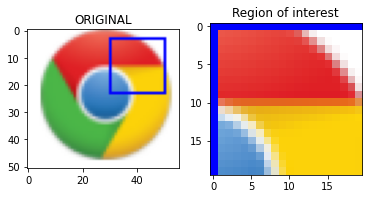

In [135]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('test.png')
print(img.shape)

# rows from 3 to 23, cols from 30:50
# rows is y, cols is x, copy[y1:y2, x1:x2]
# axis is (30, 3), (50, 23)
roi = img[3:23, 30:50]
#cv.imshow('roi', roi)
#print(roi)
cv.rectangle(img, (30, 3), (50, 23), (255,0,0))

img2 = img[:, :, ::-1]
roi2 = roi[:, :, ::-1]
# 121 - 1 row 2 cols 1st
plt.subplot(121),plt.imshow(img2,'gray'),plt.title('ORIGINAL')
plt.subplot(122),plt.imshow(roi2,'gray'),plt.title('Region of interest')

#cv.imshow('src', img)
#cv.waitKey(0)
#cv.destroyAllWindows()   

[3.1727921  3.41080907 3.16521854 ... 3.15062613 2.61436007 3.09274213]


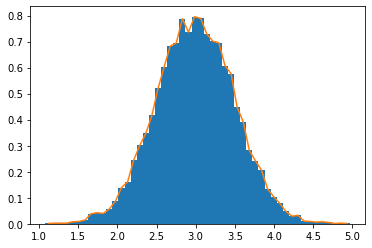

In [139]:
import numpy as np
rg = np.random.default_rng(1)


# Build a vector of 10000 normal deviates with variance 0.5^2 and mean 2
mu, sigma = 3, 0.5
v = rg.normal(mu, sigma, 10000)
print(v)
# Plot a normalized histogram with 50 bins
plt.hist(v, bins=50, density=True)       # matplotlib version (plot)
# Compute the histogram with numpy and then plot it
(n, bins) = np.histogram(v, bins=50, density=True)  # NumPy version (no plot)
plt.plot(.5 * (bins[1:] + bins[:-1]), n)

In [141]:
img1 = cv.imread('test.png')
img2 = cv.imread('test2.png')

img1 = cv.resize(img1, (200,200))
img2 = cv.resize(img2, (200,200))

dst = cv.addWeighted(img1,0.7,img2,0.3,0)

cv.imshow('dst',dst)
cv.waitKey(0)
cv.destroyAllWindows()


In [149]:
# Load two images
img1 = cv.imread('test2.png')
img2 = cv.imread('test.png')

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols]

# Now create a mask of logo and create its inverse mask also
img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(img2gray, 10, 255, cv.THRESH_BINARY)
cv.imshow('mask',mask)
mask_inv = cv.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv.bitwise_and(roi,roi,mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv.bitwise_and(img2,img2,mask = mask)

# Put logo in ROI and modify the main image
dst = cv.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

cv.imshow('res',img1)
cv.waitKey(0)
cv.destroyAllWindows()
